## AUTO ENCODERS KERAS MNIST FASHION DATASET

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to a 1D array
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))  # 784 = 28x28
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

# Get the reconstructed images
decoded_imgs = autoencoder.predict(x_test)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - val_loss: 0.2785
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2719 - val_loss: 0.2707
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - val_loss: 0.2680
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2649 - val_loss: 0.2662
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2636 - val_loss: 0.2656
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2630 - val_loss: 0.2650
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2625 - val_loss: 0.2646
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2622 - val_loss: 0.2647
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2620 - val_loss: 0.2643
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.261

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 784)               101136    
                                                                 
Total params: 201616 (787.56 KB)
Trainable params: 201616 (787.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


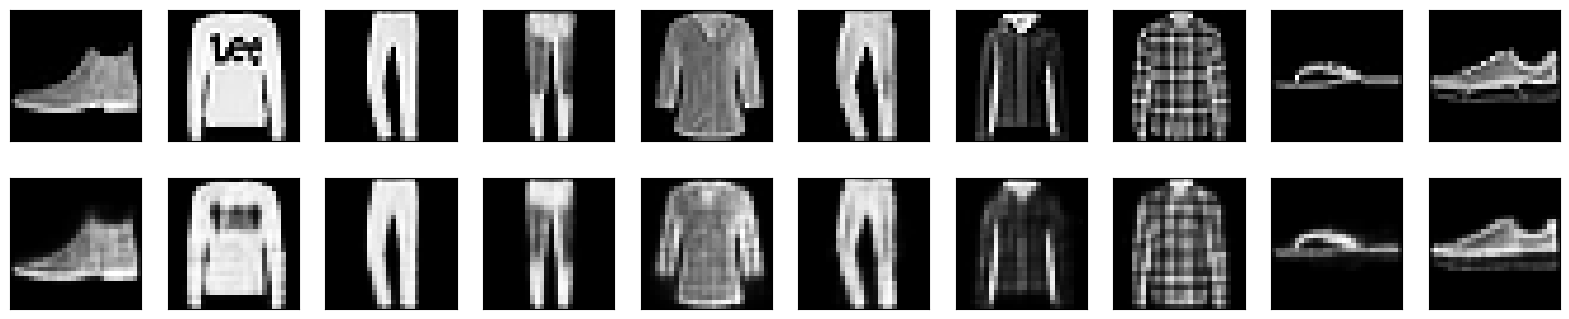

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## AUTO ENCODERS RANDOM NUMPY DATA

 just remember IDENTITY FUNCTION = INPUT = OUTPUT

## MNIST NUMBERS AUTOENCODERS

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras.models import Model

Train shape : ((60000, 28, 28), (60000,))
Test shape : ((10000, 28, 28), (10000,))


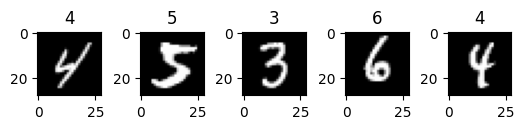

In [ ]:
(trainX , trainY) , (testX , testY) = mnist.load_data()
print('Train shape :' , (trainX.shape , trainY.shape))
print('Test shape :' , (testX.shape , testY.shape))

for j in range(5):
  i = np.random.randint(0,10000)
  plt.subplot(550+1+j)
  plt.imshow(trainX[i] , cmap = 'gray')
  plt.title(trainY[i])
plt.show()


In [ ]:
# no need to normalize

# directly flatten
train_data = np.reshape(trainX , (60000 , 28*28))
test_data = np.reshape(testX , (10000 , 28*28))

print(train_data.shape , test_data.shape)


(60000, 784) (10000, 784)


In [ ]:
input_data = Input(shape=(784,))
encoder = Dense(100,activation = 'relu')(input_data)
encoder = Dense(50,activation = 'relu')(encoder)
encoder = Dense(25,activation = 'relu')(encoder)
encoded = Dense(2)(encoder)


In [ ]:
decoder = Dense(25,activation = 'relu')(encoded)
decoder = Dense(50,activation = 'relu')(decoder)
decoder = Dense(100,activation = 'relu')(decoder)
decoded = Dense(784)(decoder)

In [ ]:
autoencoder = Model(inputs = input_data , outputs = decoded)
autoencoder.compile(loss = 'mse' , optimizer='adam')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 2)                 52        
                                                                 
 dense_8 (Dense)             (None, 25)                75        
                                                                 
 dense_9 (Dense)             (None, 50)                1300

You  can even print individual layers in summary

In [ ]:
history = autoencoder.fit(train_data , train_data , epochs = 40 , batch_size = 256 , validation_data = (test_data , test_data))

Epoch 1/40
235/235 [==============================] - 1s 5ms/step - loss: 2621.4729 - val_loss: 2637.0439
Epoch 2/40
235/235 [==============================] - 1s 5ms/step - loss: 2625.7820 - val_loss: 2636.3601
Epoch 3/40
235/235 [==============================] - 1s 5ms/step - loss: 2622.0774 - val_loss: 2617.8435
Epoch 4/40
235/235 [==============================] - 1s 5ms/step - loss: 2609.1311 - val_loss: 2658.3914
Epoch 5/40
235/235 [==============================] - 1s 5ms/step - loss: 2627.5525 - val_loss: 2666.2307
Epoch 6/40
235/235 [==============================] - 1s 6ms/step - loss: 2610.7759 - val_loss: 2650.3831
Epoch 7/40
235/235 [==============================] - 2s 7ms/step - loss: 2616.9358 - val_loss: 2606.7498
Epoch 8/40
235/235 [==============================] - 1s 5ms/step - loss: 2609.3220 - val_loss: 2659.9482
Epoch 9/40
235/235 [==============================] - 1s 5ms/step - loss: 2670.1096 - val_loss: 2638.4116
Epoch 10/40
235/235 [=========================

313/313 [==============================] - 1s 2ms/step


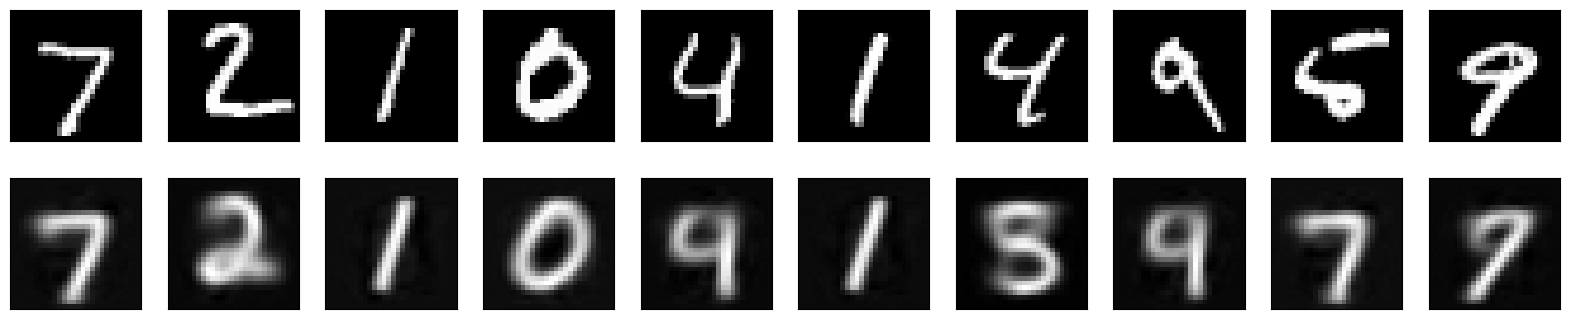

In [ ]:
import matplotlib.pyplot as plt
encoded_imgs = autoencoder.predict(test_data)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
autoencoder.save('autencoder.h5')

USING CNN


AUTO ENCODER CNN

Train shape : ((60000, 28, 28), (60000,))
Test shape : ((10000, 28, 28), (10000,))
(60000, 784) (10000, 784)
313/313 [==============================] - 1s 2ms/step


<Figure size 2000x600 with 0 Axes>

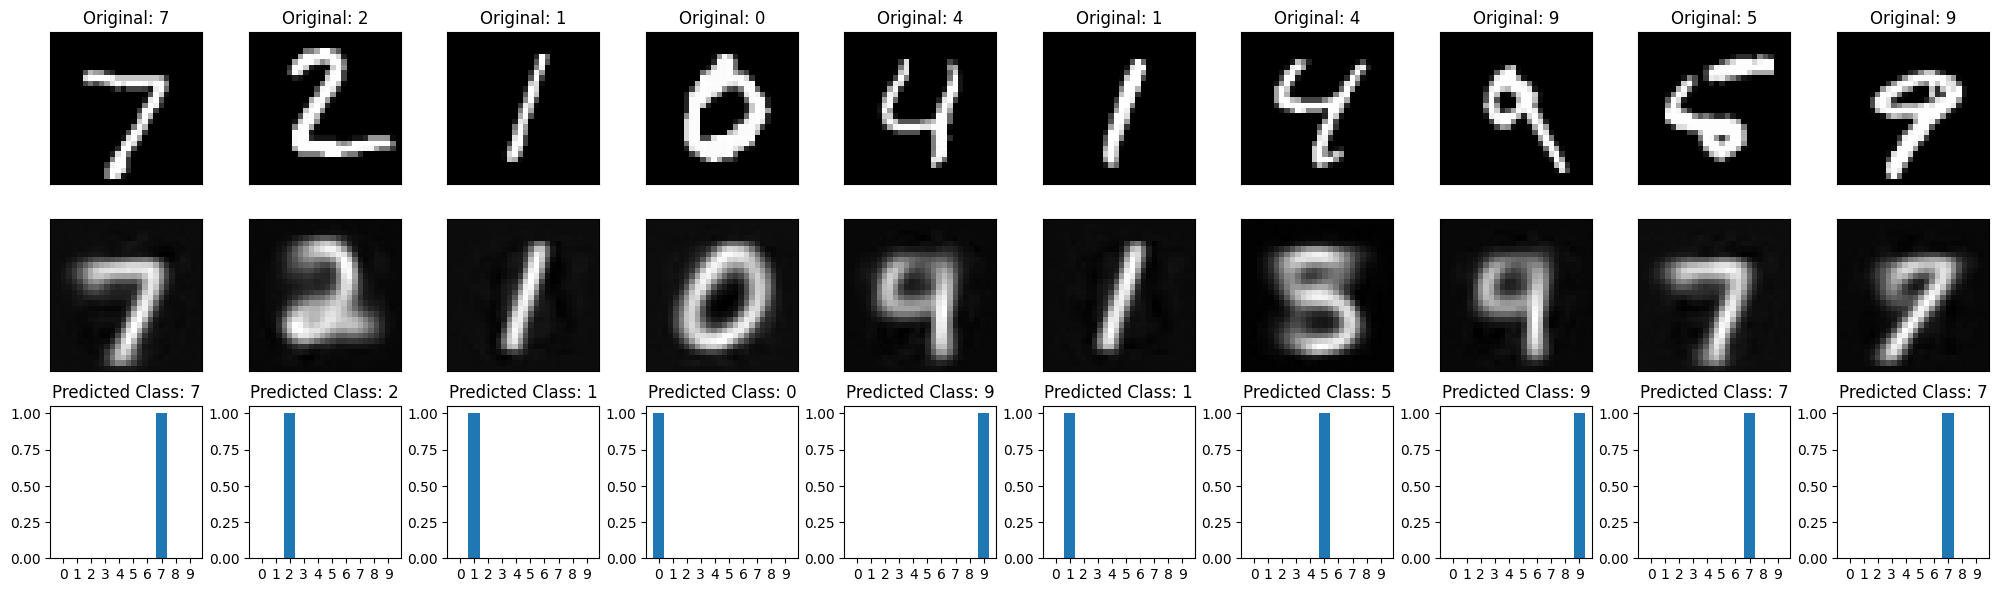

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

# no need to normalize
(trainX , trainY) , (testX , testY) = mnist.load_data()
print('Train shape :' , (trainX.shape , trainY.shape))
print('Test shape :' , (testX.shape , testY.shape))


# directly flatten
train_data = np.reshape(trainX , (60000 , 28*28))
test_data = np.reshape(testX , (10000 , 28*28))

print(train_data.shape , test_data.shape)

# Load the autoencoder model
autoencoder = load_model('/content/autencoder.h5')

# Load the CNN model for digit classification
cnn_model = load_model('cnn_mnist_model.h5')

# Generate images using the autoencoder
encoded_imgs = autoencoder.predict(test_data)

# Reshape encoded images to match the input shape expected by the CNN model
encoded_imgs_reshaped = encoded_imgs.reshape(-1, 28, 28, 1)

# Predict on the reshaped generated images using the CNN model
predicted_classes = cnn_model.predict(encoded_imgs_reshaped)

# Plot the original and generated images along with their predicted classes
n = 10
# Plot the original and generated images along with their predicted classes
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Original: {testY[i]}')  # Add original class as title

    # Display generated image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display predicted class
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.bar(range(10), predicted_classes[i])
    plt.xticks(range(10))
    ax.set_title(f'Predicted Class: {np.argmax(predicted_classes[i])}')  # Add predicted class as title

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


1/1 [==============================] - 0s 106ms/step
Input Digit Class: 8
Generated Image:


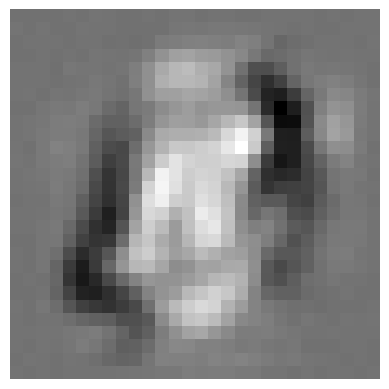

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the CNN model for digit classification
cnn_model = load_model('/content/cnn_mnist.h5')

# Load the autoencoder model for digit generation
autoencoder_model = load_model('/content/autencoder.h5')

# Define a function to combine both models
def generate_digit_image(input_digit):
    # Reshape the input digit to match the shape expected by the autoencoder model
    input_digit = np.reshape(input_digit, (1, 784))

    # Classify the input digit using the CNN model
    digit_class = np.argmax(cnn_model.predict(np.reshape(input_digit, (1, 28, 28, 1))))

    # Generate an image of the input digit using the autoencoder model
    generated_image = autoencoder_model.predict(input_digit)

    return digit_class, generated_image

# Test the combined model by providing a digit as input
input_digit = np.random.rand(28, 28, 1)  # You can replace this with any input digit
digit_class, generated_image = generate_digit_image(input_digit)

print("Input Digit Class:", digit_class)
print("Generated Image:")
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
